 ## 🚲 Bike Sharing Demand Prediction 

1. Importing Liabraries


In [660]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import shap

import warnings
warnings.filterwarnings('ignore')

2. Data Understanding & Exploration

In [661]:
df=pd.read_csv("BoomBikes.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [662]:
df.shape

(730, 16)

In [663]:
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  01-01-2018       1   0  ...  10.749882     331         654   985
1          2  02-01-2018       1   0  ...  16.652113     131         670   801
2          3  03-01-2018       1   0  ...  16.636703     120        1229  1349
3          4  04-01-2018       1   0  ...  10.739832     108        1454  1562
4          5  05-01-2018       1   0  ...  12.522300      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
725      726  27-12-2019       1   1  ...  23.458911     247        1867  2114
726      727  28-12-2019       1   1  ...  10.416557     644        2451  3095
727      728  29-12-2019       1   1  ...   8.333661     159        1182  1341
728      729  30-12-2019       1   1  ...  23.500518     364        1432  1796
729      730  31-12-2019       1   1  ...  10.374682     439        2290  2729

[730 rows x 16 colu

In [664]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [665]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  01-01-2018       1   0  ...  10.749882     331         654   985
1          2  02-01-2018       1   0  ...  16.652113     131         670   801
2          3  03-01-2018       1   0  ...  16.636703     120        1229  1349
3          4  04-01-2018       1   0  ...  10.739832     108        1454  1562
4          5  05-01-2018       1   0  ...  12.522300      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
725      726  27-12-2019       1   1  ...  23.458911     247        1867  2114
726      727  28-12-2019       1   1  ...  10.416557     644        2451  3095
727      728  29-12-2019       1   1  ...   8.333661     159        1182  1341
728      729  30-12-2019       1   1  ...  23.500518     364        1432  1796
729      730  31-12-2019       1   1  ...  10.374682     439        2290  2729

[730 rows x 16 co

In [666]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [667]:
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [668]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [669]:
df.loc[(df['season']==1), 'season']='spring'
df.loc[(df['season']==2), 'season']='summer'
df.loc[(df['season']==3), 'season']='fall'
df.loc[(df['season']==4), 'season']='winter'

In [670]:
df["dteday"] = pd.to_datetime(df["dteday"], format="%d-%m-%Y")
df["date"] = df["dteday"].dt.date       
df["day"] = df["dteday"].dt.day         
df["month"] = df["dteday"].dt.month     
df["year"] = df["dteday"].dt.year        


In [671]:
def object_map_month(x):
    return x.map({1: 'Jan',2: 'Feb',3: 'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [672]:
df[['month']]=df[['month']].apply(object_map_month)

In [673]:
df['season'].astype('category').value_counts()


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [674]:
df['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [675]:
df['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [676]:
df['month'].astype('category').value_counts()

month
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [677]:
df['workingday'].astype('category').value_counts()


workingday
1    504
0    226
Name: count, dtype: int64

In [678]:
weather_mapping = {
    1: "Clear",
    2: "Mist + Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
df["weathersit"] = df["weathersit"].map(weather_mapping)

In [679]:
df['weathersit'].astype('category').value_counts()

weathersit
Clear              463
Mist + Cloudy      246
Light Snow/Rain     21
Name: count, dtype: int64

In [680]:
def str_map_weekday(x):
    return x.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})

In [681]:
df[['weekday']]=df[['weekday']].apply(str_map_weekday)

In [682]:
df[['date']]=df[['date']].astype('datetime64[ns]')

In [683]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,day,month,year
0,1,2018-01-01,spring,0,1,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01,1,Jan,2018
1,2,2018-01-02,spring,0,1,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02,2,Jan,2018
2,3,2018-01-03,spring,0,1,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03,3,Jan,2018
3,4,2018-01-04,spring,0,1,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04,4,Jan,2018
4,5,2018-01-05,spring,0,1,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05,5,Jan,2018


In [684]:
df_categorical=df.select_dtypes(exclude=['float64','int64','datetime64','int32'])
df_categorical.columns

Index(['season', 'weekday', 'weathersit', 'month'], dtype='object')

In [685]:
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
date          datetime64[ns]
day                    int32
month                 object
year                   int32
dtype: object


In [686]:
df = df.drop(columns=['dteday', 'mnth', 'yr'])


In [687]:
df.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,day,month,year
0,1,spring,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01,1,Jan,2018
1,2,spring,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02,2,Jan,2018
2,3,spring,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03,3,Jan,2018
3,4,spring,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04,4,Jan,2018
4,5,spring,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05,5,Jan,2018


3. EDA

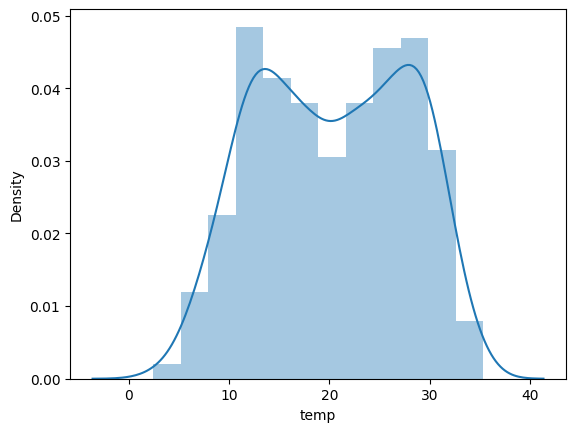

In [688]:
sns.distplot(df['temp'])
plt.show()

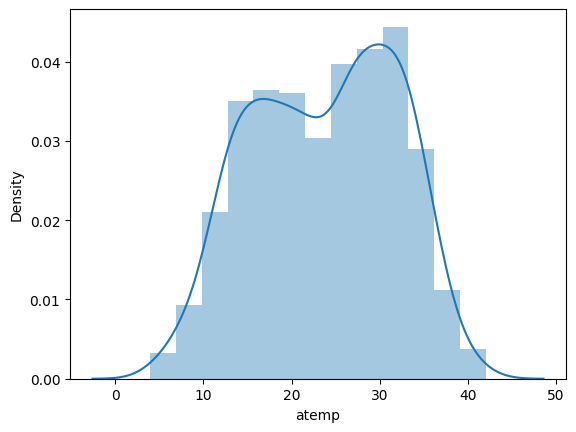

In [689]:
sns.distplot(df['atemp'])
plt.show()

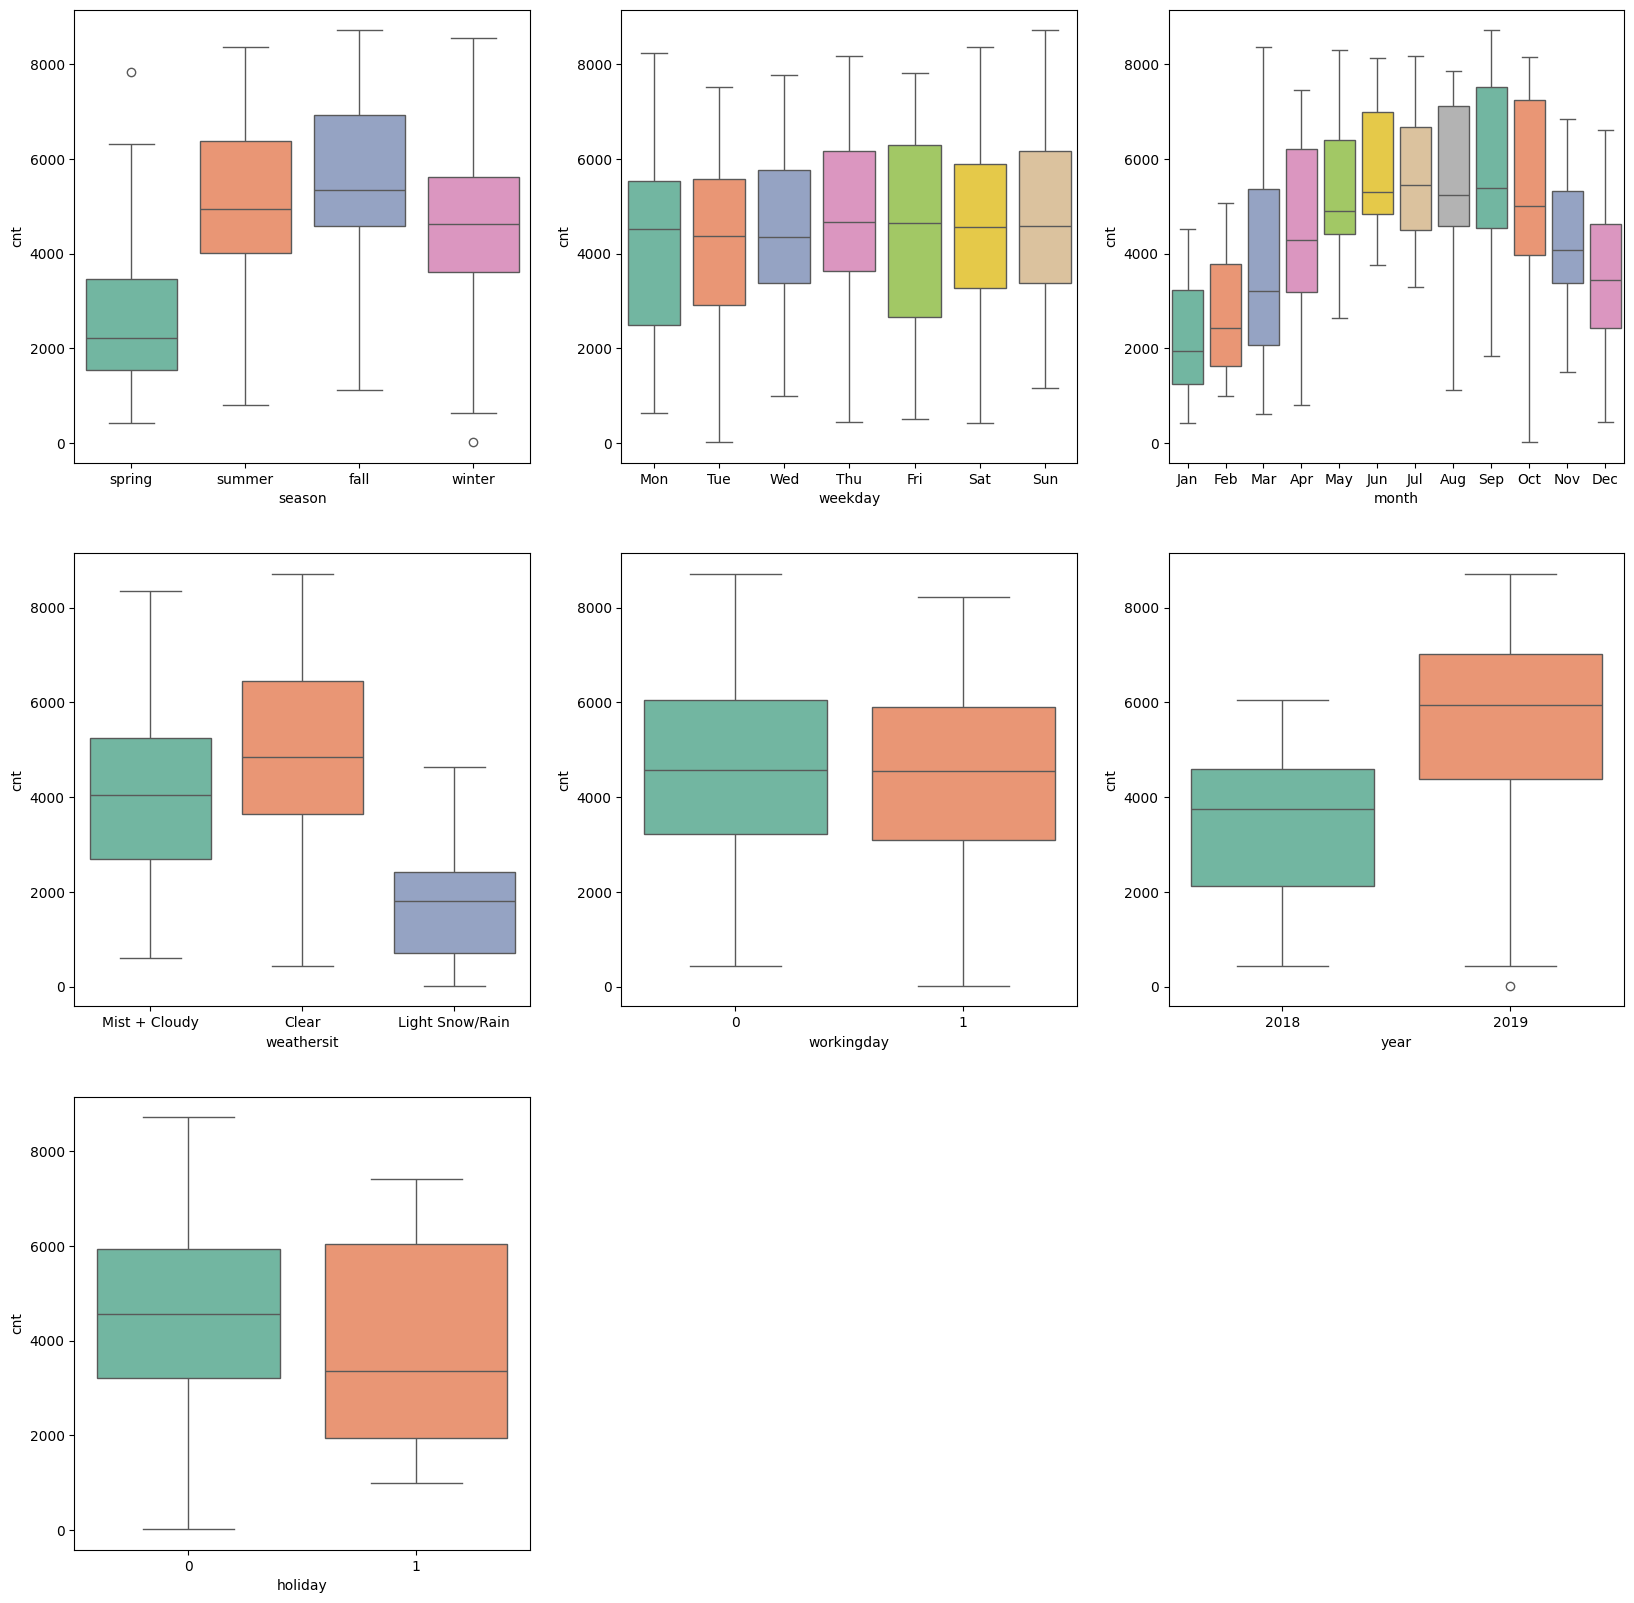

In [690]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,2)
sns.boxplot(x='weekday',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,3)
sns.boxplot(x='month',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,6)
sns.boxplot(x='year',y='cnt',data=df,palette='Set2')
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=df,palette='Set2')
plt.show()

In [691]:
intVarlist=['casual','registered','cnt']

for var in intVarlist:
    df[var]=df[var].astype('float')

In [692]:
df_numeric=df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


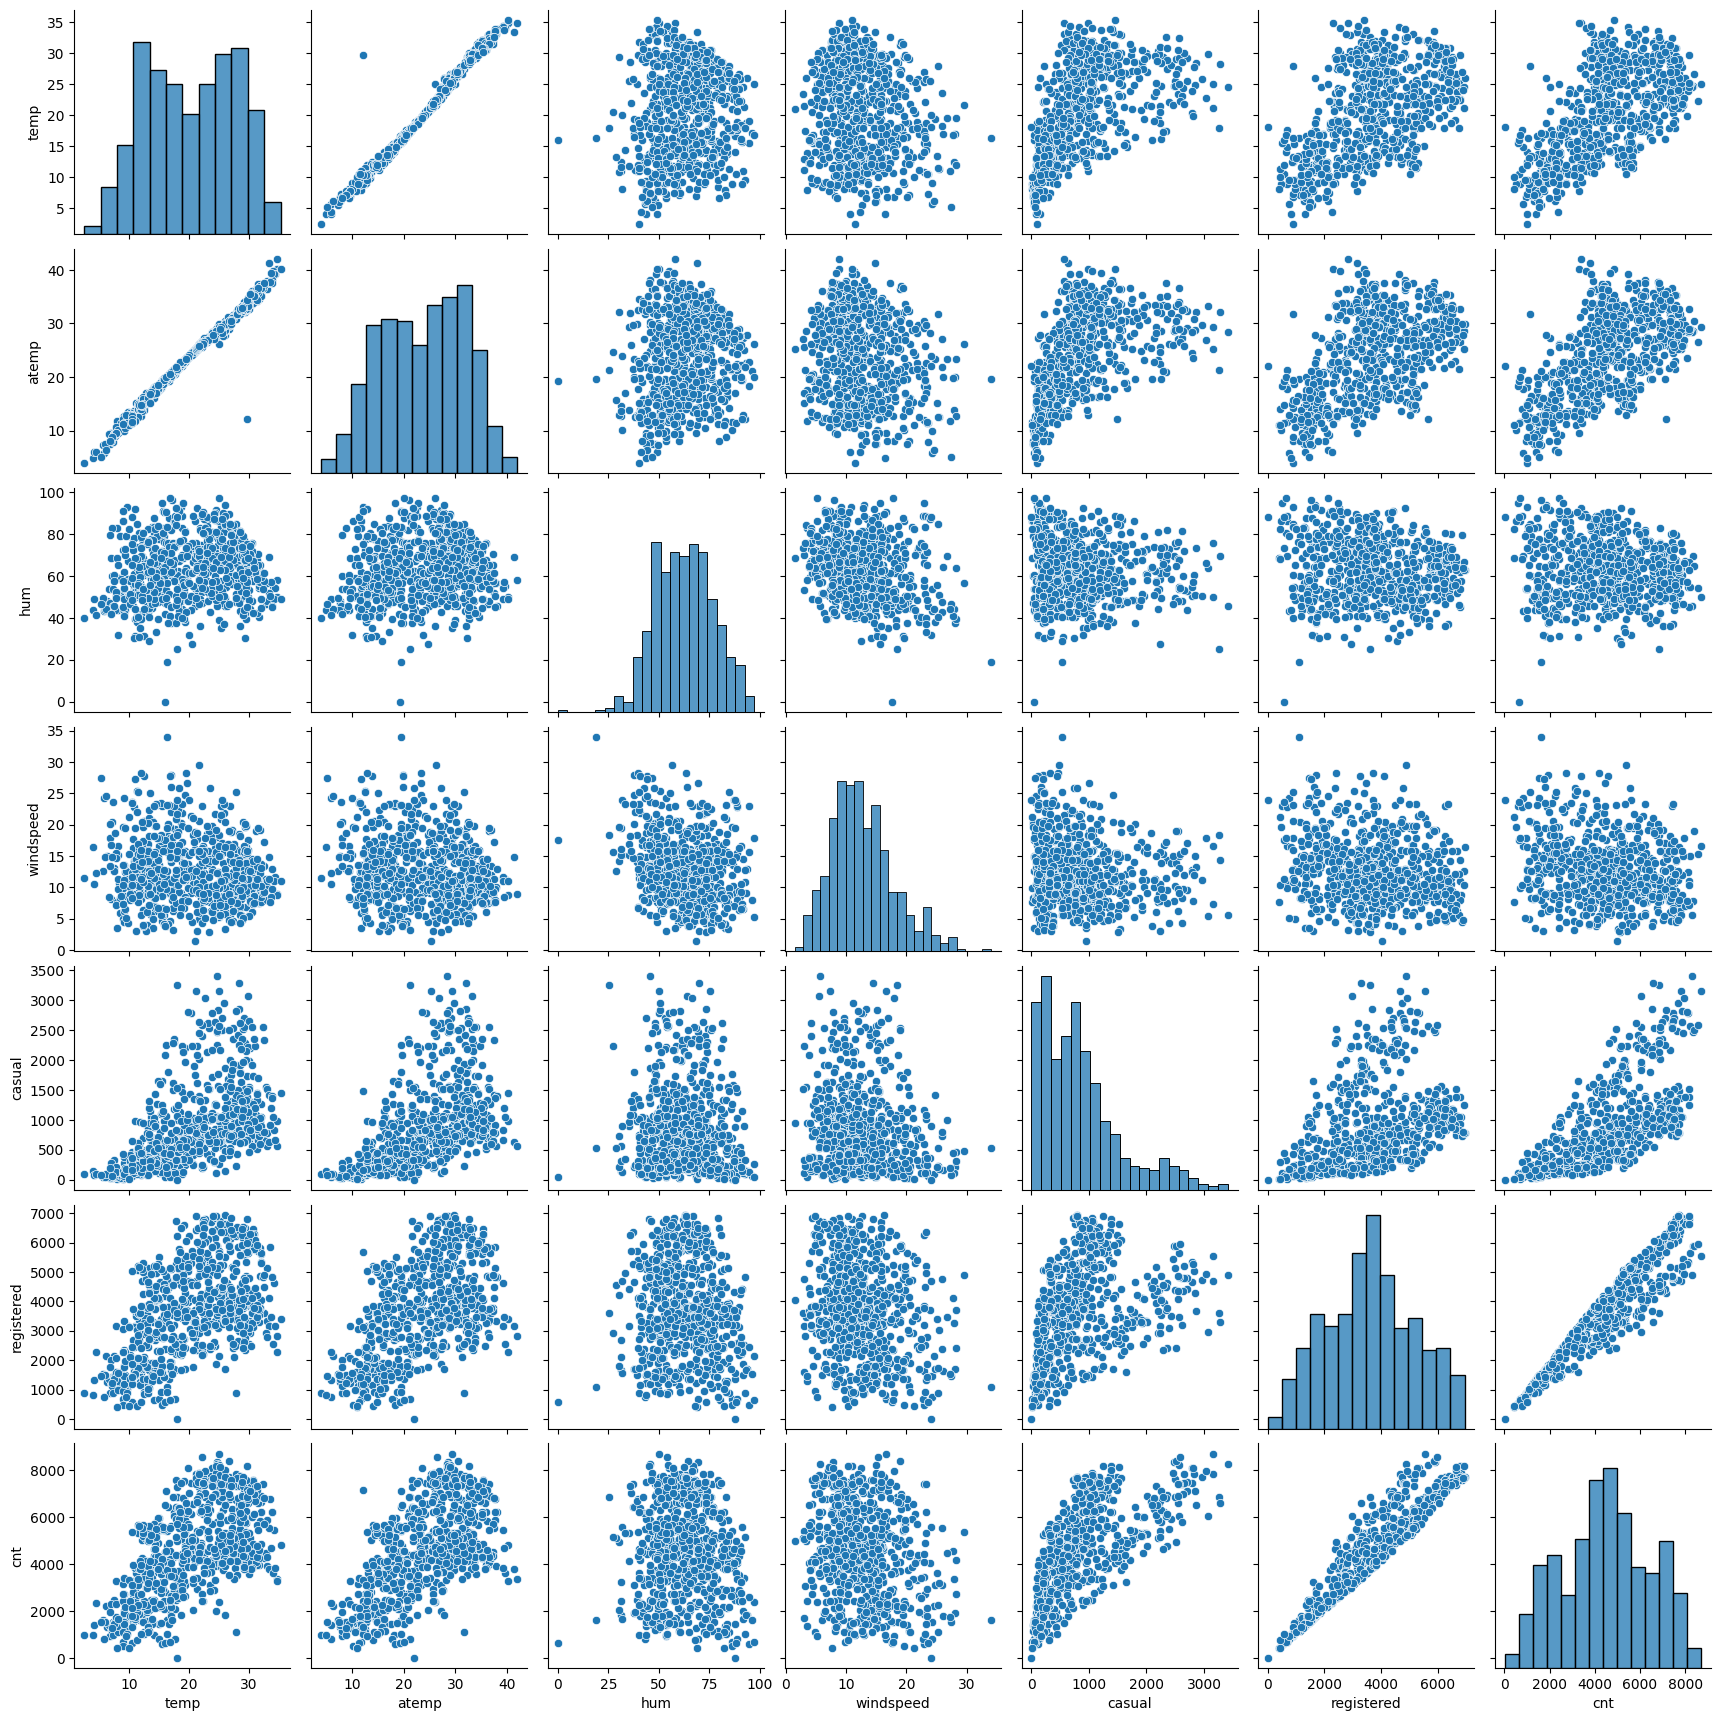

In [693]:
sns.pairplot(df_numeric)
plt.show()

In [694]:
cor=df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

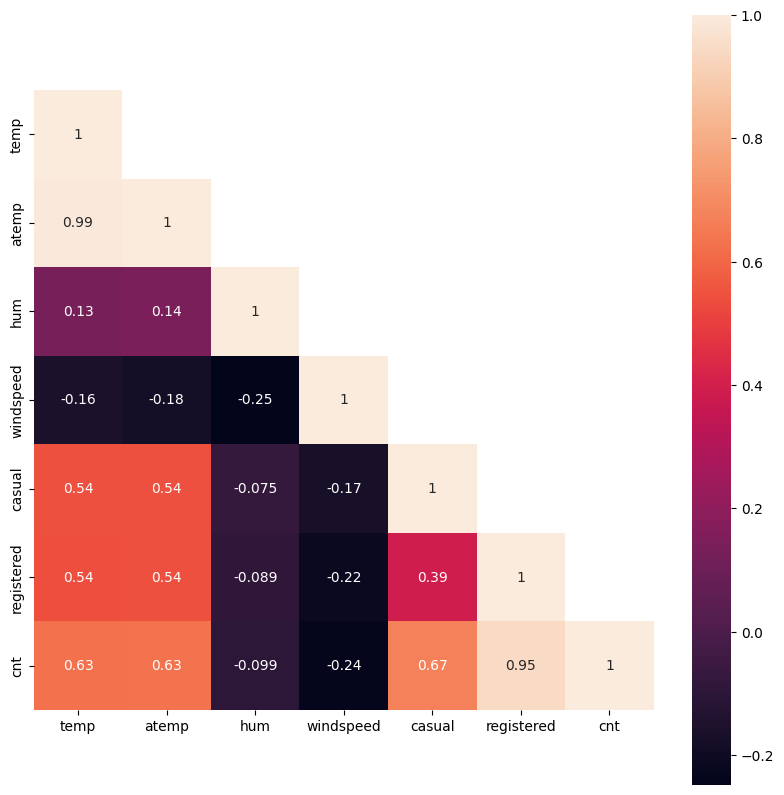

In [695]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, square=True,annot=True)

In [696]:
df.drop('atemp',axis=1, inplace=True)
df

,instant,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,date,day,month,year
0,1,spring,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,331.0,654.0,985.0,2018-01-01,1,Jan,2018
1,2,spring,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,131.0,670.0,801.0,2018-01-02,2,Jan,2018
2,3,spring,0,Wed,1,Clear,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,2018-01-03,3,Jan,2018
3,4,spring,0,Thu,1,Clear,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,2018-01-04,4,Jan,2018
4,5,spring,0,Fri,1,Clear,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,2018-01-05,5,Jan,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,spring,0,Fri,1,Mist + Cloudy,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,2019-12-27,27,Dec,2019
726,727,spring,0,Sat,0,Mist + Cloudy,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,2019-12-28,28,Dec,2019
727,728,spring,0,Sun,0,Mist + Cloudy,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,2019-12-29,29,Dec,2019
728,729,spring,0,Mon,1,Clear,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,2019-12-30,30,Dec,2019


4. Data Preparation


In [697]:
df_categorical=df_categorical.select_dtypes(include=['object'])
df_categorical.head()

,season,weekday,weathersit,month
0,spring,Mon,Mist + Cloudy,Jan
1,spring,Tue,Mist + Cloudy,Jan
2,spring,Wed,Clear,Jan
3,spring,Thu,Clear,Jan
4,spring,Fri,Clear,Jan


In [698]:
df_dummies=pd.get_dummies(df_categorical,dtype=int,drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [699]:
df=df.drop(list(df_categorical.columns),axis=1)
df

,instant,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,date,day,year
0,1,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,2018-01-01,1,2018
1,2,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,2018-01-02,2,2018
2,3,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,2018-01-03,3,2018
3,4,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,2018-01-04,4,2018
4,5,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,2018-01-05,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,2019-12-27,27,2019
726,727,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,2019-12-28,28,2019
727,728,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,2019-12-29,29,2019
728,729,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,2019-12-30,30,2019


In [700]:
df=pd.concat([df,df_dummies],axis=1)
df
             

,instant,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,date,day,year,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,2018-01-01,1,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,2018-01-02,2,2018,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,2018-01-03,3,2018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,2018-01-04,4,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,2018-01-05,5,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,2019-12-27,27,2019,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
726,727,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,2019-12-28,28,2019,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
727,728,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,2019-12-29,29,2019,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
728,729,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,2019-12-30,30,2019,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [701]:
df=df.drop(['instant','date'],axis=1,inplace=False)
df.head()

,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,day,year,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,2,2018,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,3,2018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,4,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,5,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


5. Model building & evaluation


In [750]:
df.shape

(730, 32)

In [ ]:
#Data Splitting 
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop([ "cnt","casual", "registered"], axis=1)  
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = 1 - (rmse_lr / y_test.mean())

print("Linear Regression Results:")
print("R2 Score:", r2_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("Accuracy:", accuracy_lr)

results_lr = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_lr
})
print("\nSample Predictions (Linear Regression):")
print(results_lr.head(10))   



Linear Regression Results:
R2 Score: 0.8593403647845415
RMSE: 693.8700906026853
MAE: 534.8601235438215
Accuracy: 0.8406577327838809

Sample Predictions (Linear Regression):
   Actual    Predicted
0  7460.0  6274.584600
1  4788.0  4361.162575
2  3331.0  3680.439496
3  3068.0  1819.649176
4  7338.0  7131.066181
5  5423.0  4868.731909
6  2046.0  2634.685365
7  2121.0  2706.070881
8  3409.0  3385.123898
9  3620.0  3616.244794


In [ ]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = 1 - (rmse_dt / y_test.mean())

print("Decision Tree Results:")
print("R2 Score:", r2_dt)
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("Accuracy:", accuracy_dt)

results_dt = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_dt
})
print("\nSample Predictions (Decision Tree):")
print(results_dt.head(10))


Decision Tree Results:
R2 Score: 0.8613479862845039
RMSE: 688.9005236656808
MAE: 500.06849315068496
Accuracy: 0.8417989580269761

Sample Predictions (Decision Tree):
   Actual  Predicted
0  7460.0     6133.0
1  4788.0     4758.0
2  3331.0     3613.0
3  3068.0     2660.0
4  7338.0     6855.0
5  5423.0     4352.0
6  2046.0     2133.0
7  2121.0     2455.0
8  3409.0     4795.0
9  3620.0     3310.0


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = 1 - (rmse_rf / y_test.mean())

print("Random Forest Results:")
print("R2 Score:", r2_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("Accuracy:", accuracy_rf)

results_rf = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_rf
})
print("\nSample Predictions (Random Forest):")
print(results_rf.head(10))


Random Forest Results:
R2 Score: 0.9014960975267878
RMSE: 580.6576370003665
MAE: 437.593698630137
Accuracy: 0.8666561570976083

Sample Predictions (Random Forest):
   Actual  Predicted
0  7460.0    6495.45
1  4788.0    4456.45
2  3331.0    3265.81
3  3068.0    2404.40
4  7338.0    7248.27
5  5423.0    4297.69
6  2046.0    1903.54
7  2121.0    2130.30
8  3409.0    3652.60
9  3620.0    3518.66


6. Model Comparisons

In [764]:
results_summary = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [r2_lr, r2_dt, r2_rf],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf],
    "MAE": [mae_lr, mae_dt, mae_rf],
    "Accuracy": [accuracy_lr, accuracy_dt, accuracy_rf]
})

print("\nModel Comparison:")
print(results_summary)


Model Comparison:
               Model  R2 Score        RMSE         MAE  Accuracy
0  Linear Regression  0.859340  693.870091  534.860124  0.840658
1      Decision Tree  0.861348  688.900524  500.068493  0.841799
2      Random Forest  0.901496  580.657637  437.593699  0.866656


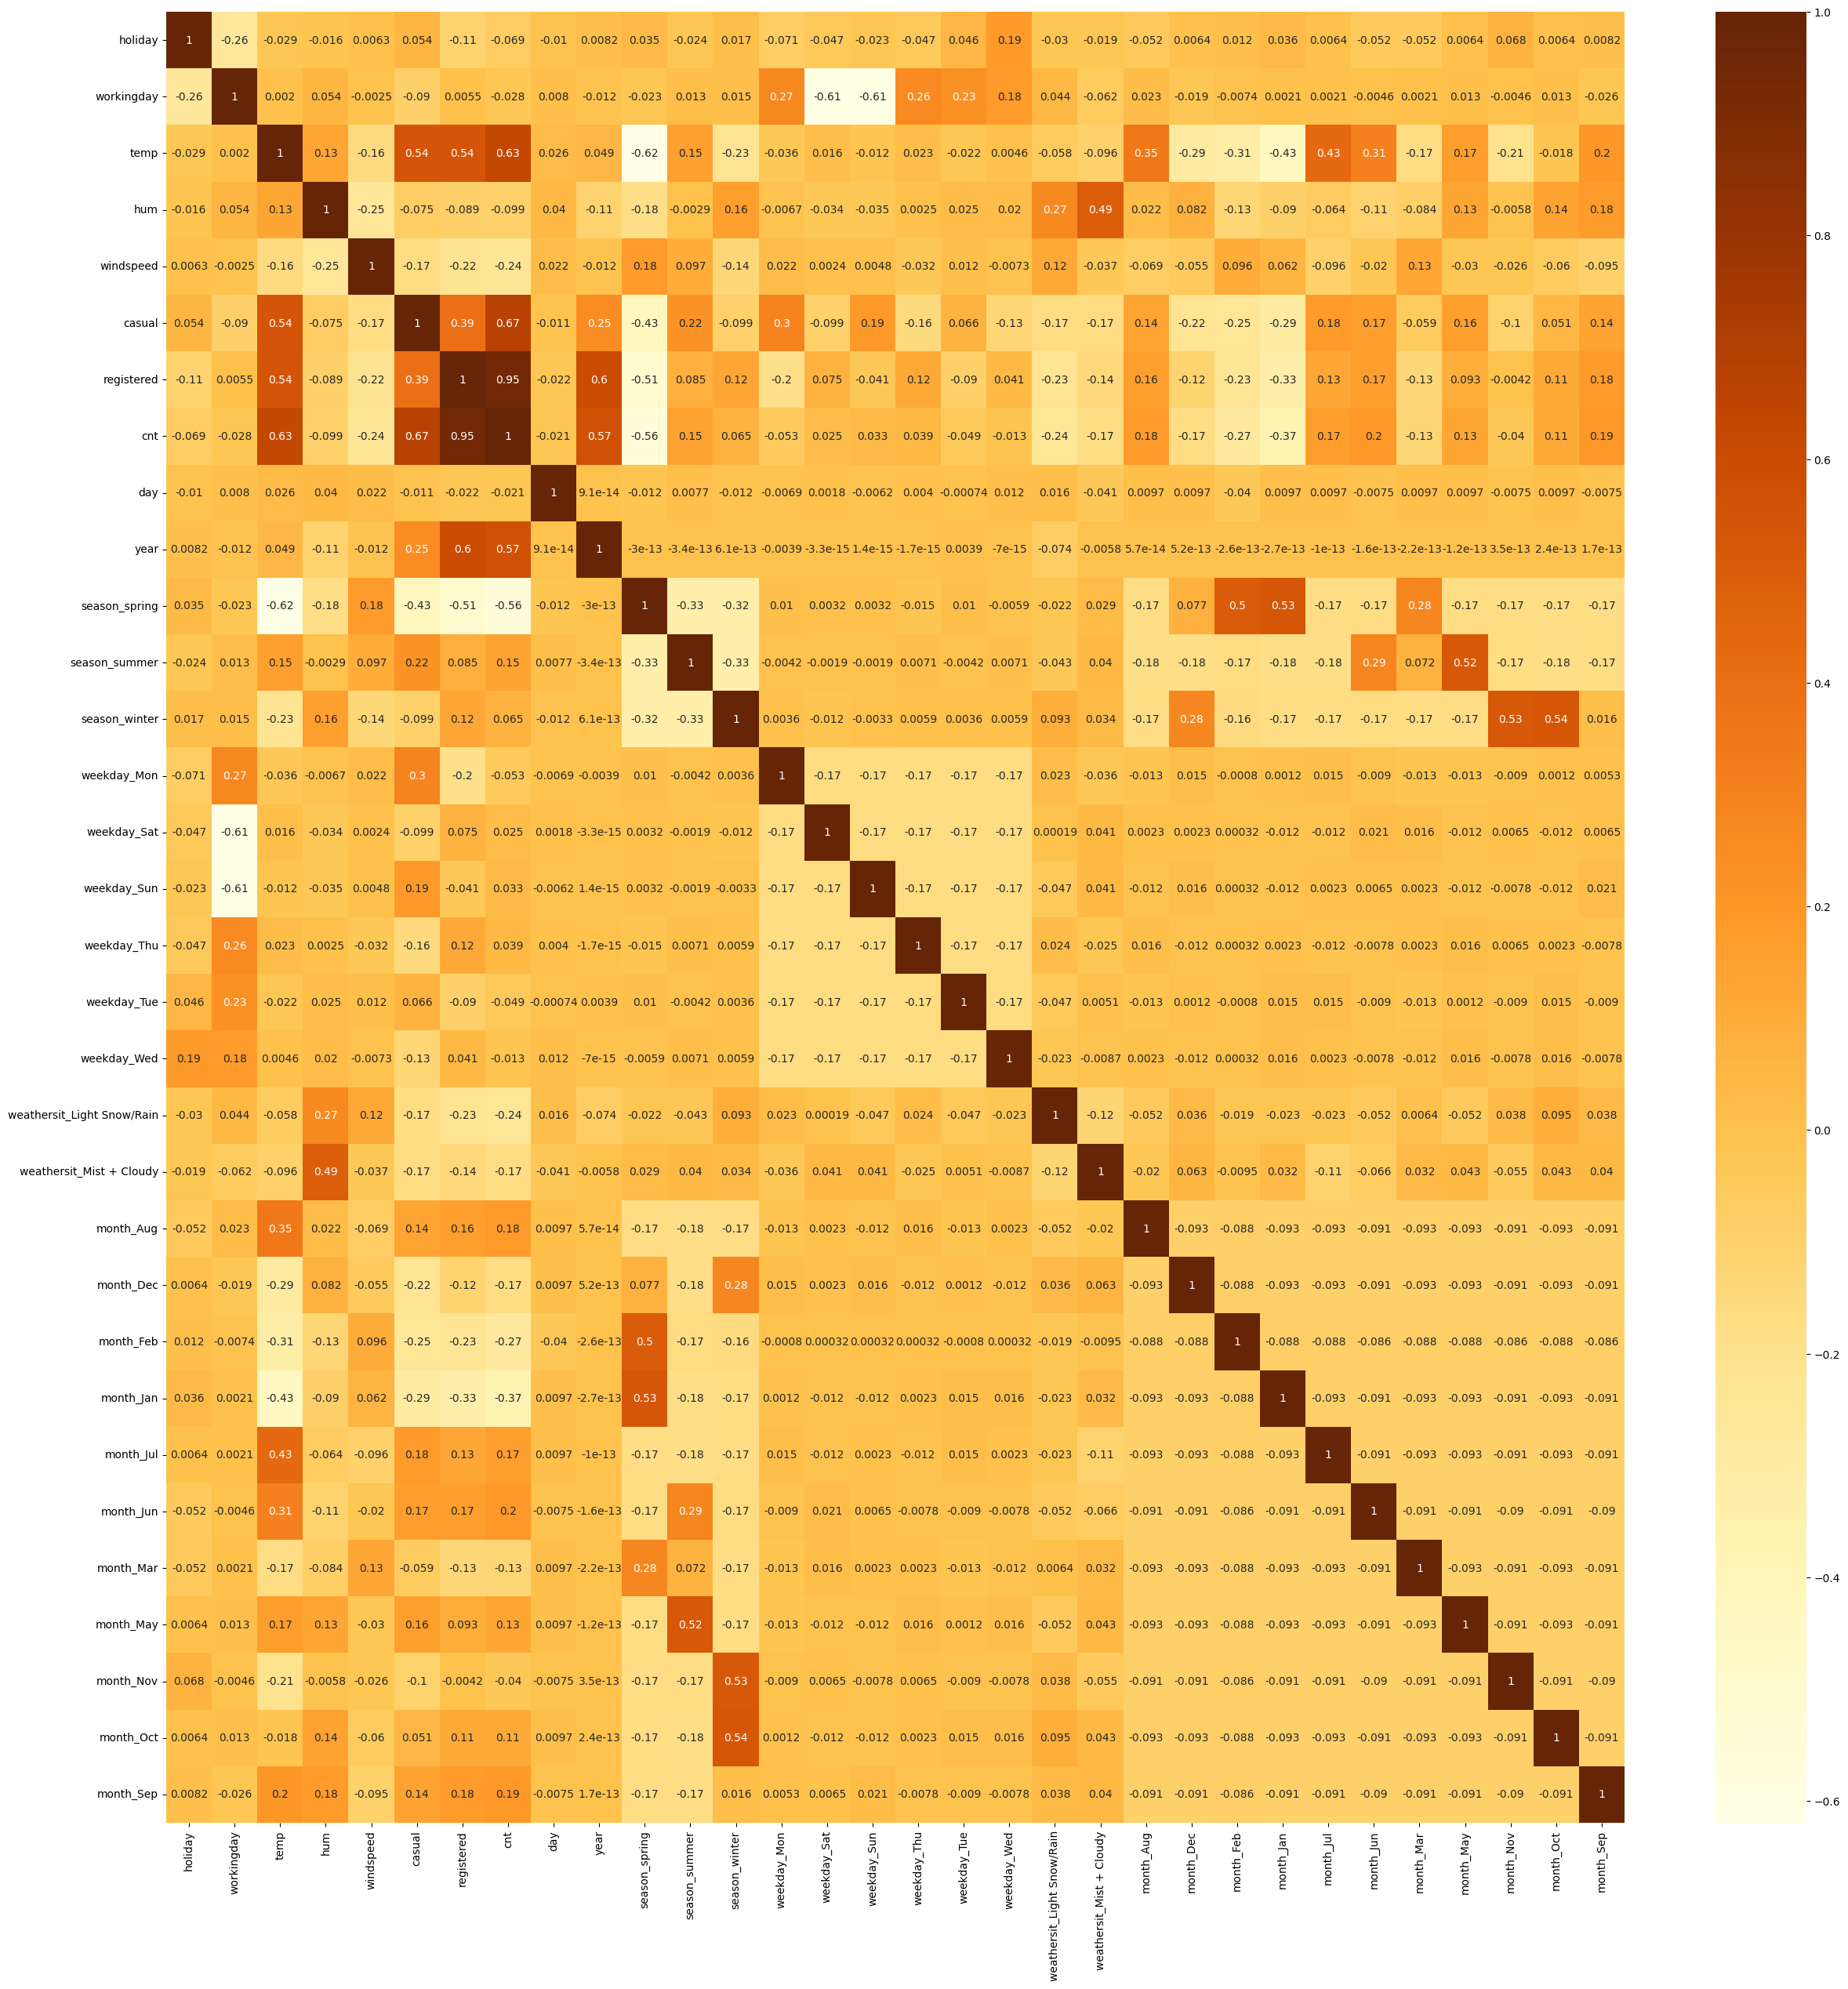

In [769]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")
plt.show()


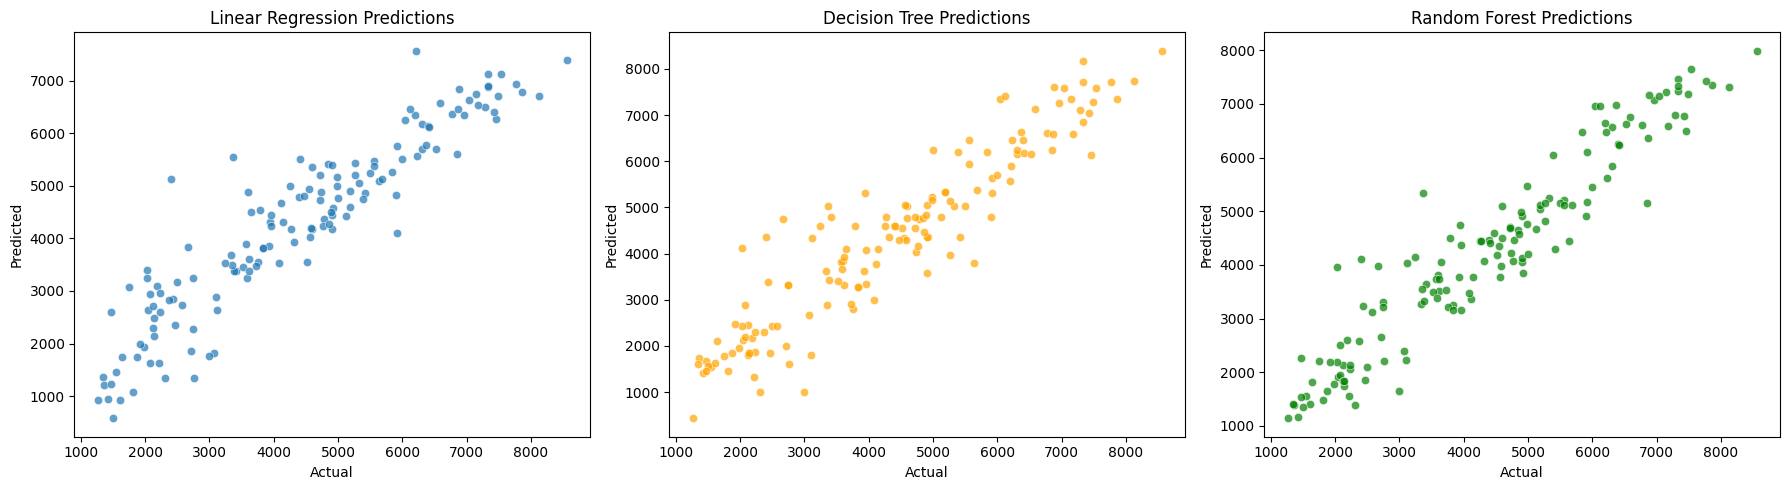

In [770]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0], alpha=0.7)
axes[0].set_title("Linear Regression Predictions")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Decision Tree
sns.scatterplot(x=y_test, y=y_pred_dt, ax=axes[1], alpha=0.7, color="orange")
axes[1].set_title("Decision Tree Predictions")
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")

# Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[2], alpha=0.7, color="green")
axes[2].set_title("Random Forest Predictions")
axes[2].set_xlabel("Actual")
axes[2].set_ylabel("Predicted")

plt.tight_layout()
plt.show()
